<a href="https://colab.research.google.com/github/volvotkar/MNIST-CNN/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras

In [3]:
mnist = keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


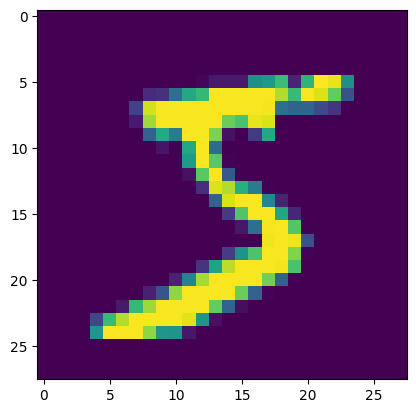

5


In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

print(y_train[0])

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

X_train = X_train.astype("float32")
X_train /= 255

X_test = X_test.astype("float32")
X_test /= 255

In [7]:
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
# Training
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.6901 - accuracy: 0.7890 - val_loss: 0.4730 - val_accuracy: 0.8798
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6668 - accuracy: 0.7955 - val_loss: 0.4575 - val_accuracy: 0.8828
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6487 - accuracy: 0.8021 - val_loss: 0.4434 - val_accuracy: 0.8853
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6376 - accuracy: 0.8060 - val_loss: 0.4314 - val_accuracy: 0.8872
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6180 - accuracy: 0.8104 - val_loss: 0.4195 - val_accuracy: 0.8897
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6105 - accuracy: 0.8142 - val_loss: 0.4093 - val_accuracy: 0.8914
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5998 - accuracy: 0.8159 - val_loss: 0.4005 - val_accuracy: 0.8936
Epo

313/313 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.9097
[0.32525768876075745, 0.9096999764442444]


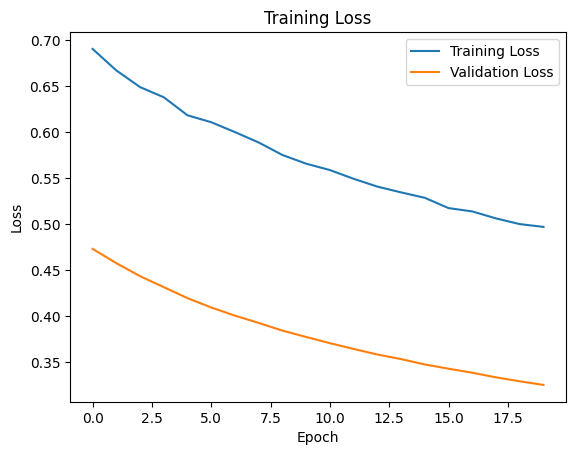

In [13]:
print(model.evaluate(X_test, y_test))


# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

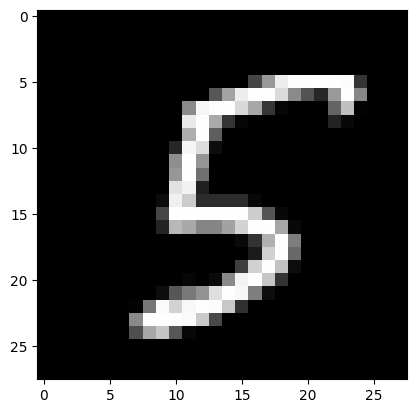

1/1 [==============================] - 0s 63ms/step
Predicted Class: 5


In [14]:
test_image = X_test[23]

# Plot the test image
plt.imshow(test_image, cmap='gray')
plt.show()

# Reshape the test image to match the input shape expected by your model
test_image = test_image.reshape(1, 28, 28, 1)

# Normalize the pixel values (assuming your model was trained with normalized data)
test_image = test_image.astype('float32') / 255

# Predict the class probabilities
class_probabilities = model.predict(test_image)

# Get the predicted class (index of the class with the highest probability)
predicted_class = class_probabilities.argmax()

print("Predicted Class:", predicted_class)